In [1]:
# this cell is tagged `parameters`
ticker = "BRAG"
start_date = "2019-01-01"
end_date="2023-02-20"

In [2]:
# Parameters
ticker = "BRAG.TO"
start_date = "2019-04-01"
end_date = "2023-02-21"


In [3]:
%pip install mplfinance matplotlib yfinance


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


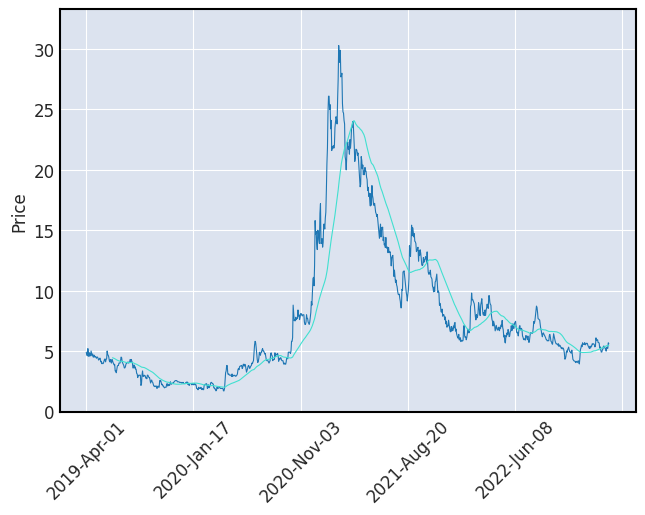

BRAG.TO: No data found for this date range, symbol may be delisted
Expect data.index as DatetimeIndex
No data for last year


In [4]:
import yfinance as yf
import mplfinance as mpf
sp = yf.Ticker(ticker)
# Consider grabbing for valid date index instead
daily = sp.history(start=start_date)
mpf.plot(daily,type='line', mav=50)
try:
    last_year = sp.history(start=end_date)
    mpf.plot(last_year,type='candle',mav=(15, 30),volume=True)
except Exception as e:
    print(e)
    print("No data for last year")

/usr/local/python/3.10.4/lib/python3.10/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


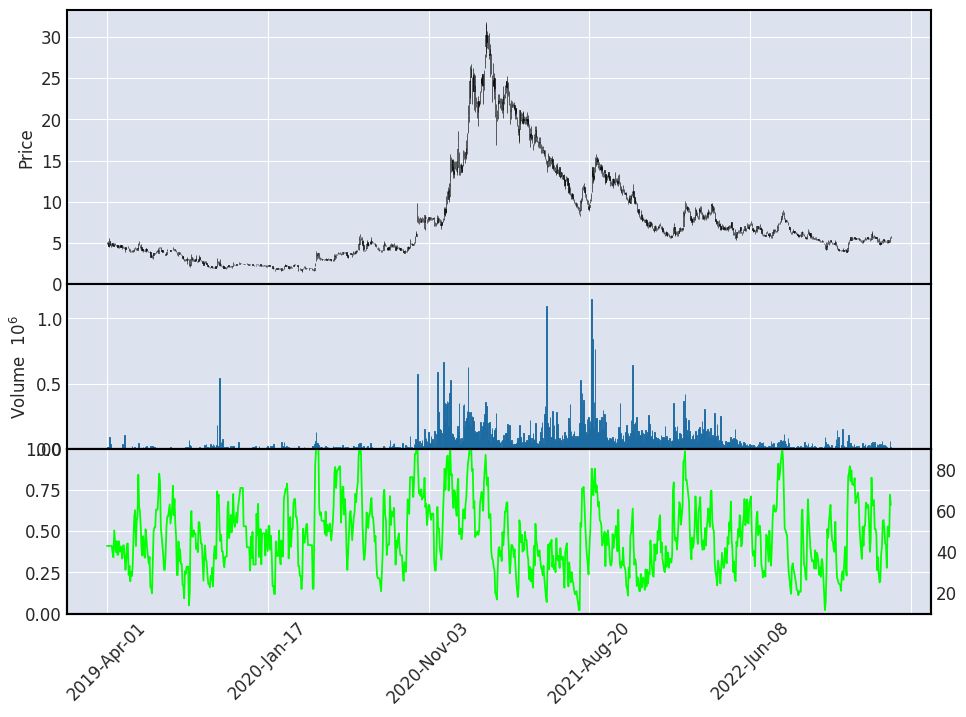

In [5]:
import numpy as np
def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100. / (1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

daily['rsi'] = relative_strength(daily['Close'],n=7)

apd = mpf.make_addplot(daily['rsi'],panel=2,color='lime',ylim=(10,90),secondary_y=True)

mpf.plot(daily,type='candle',volume=True,figscale=1.5,addplot=apd,panel_ratios=(1,0.6))